# Dependencies loading

In [1]:
# external modules loading
import os
import pathlib
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# local modules loading
sys.path.append(str(pathlib.Path(os.path.abspath('..')).parents[0]))
from modules.py_modules import xai_wrapper
from modules.py_modules import feature_engineering
from modules.py_modules import ml_models_training

# paths
path_read = "../../../data/robustness_check/processed_data"
path_write = "../../../results/robustness_check/catboost"

# Dataset loading and application of initial transformation

In [2]:
df = pd.read_csv(f"{path_read}/final_dataset_all.csv")
df = feature_engineering.initial_transformations(df)

# Features setup

In [3]:
targets = ["panback", "pandem"]
features = ['polyarchy', 'rule', 'cases_ratio', 'education_log', 
            'ethnic_frac', 'ling_frac', 'relig_frac', 'gini_log',
            'gdp_pc_log', 'inflation', 'density_log', 'trade_gdp_log', 
            'oil', 'mineral', 'region_geo', 'income_group']
cat_features = ['region_geo', 'income_group']

# Models training

In [4]:
%%capture output
models = {i:ml_models_training.catboost_model(df, i, features, cat_features) for i in targets}

In [5]:
for i,j in models.items():
    print("Model:", i, "has following hyperparameters:", j["params"])

Model: panback has following hyperparameters: {'depth': 4, 'iterations': 20, 'learning_rate': 0.3}
Model: pandem has following hyperparameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}


# Models investigation using XAI

'Model panback'

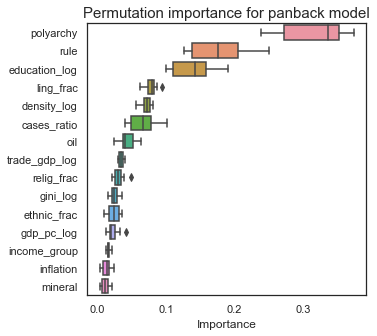

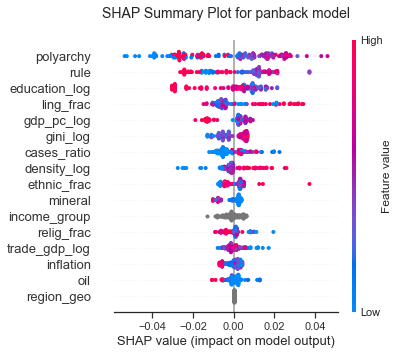

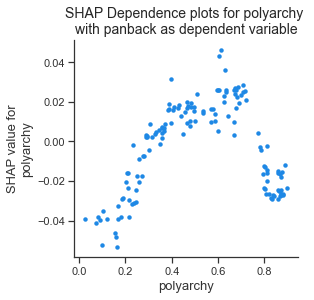

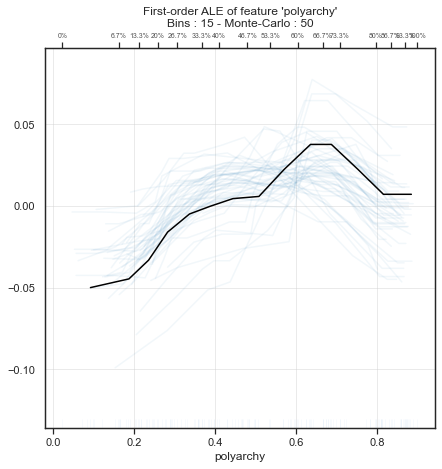

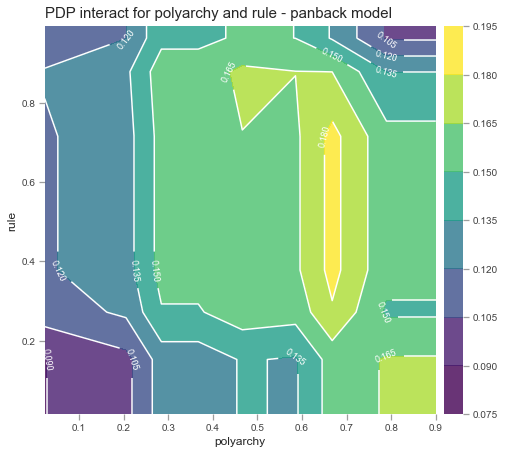

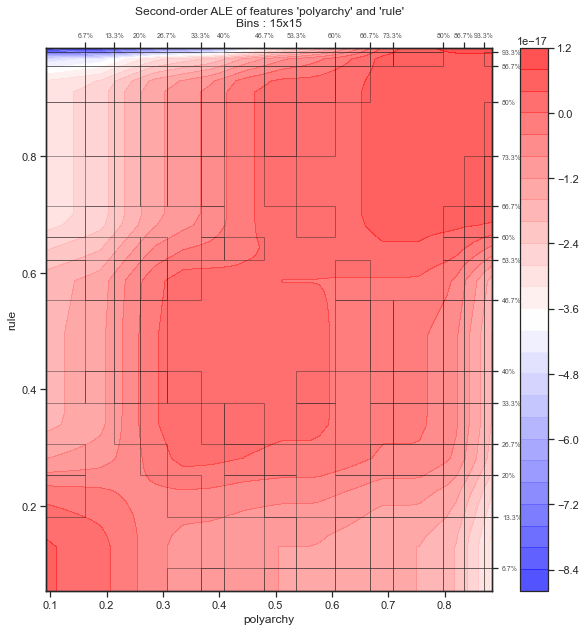

'Model pandem'

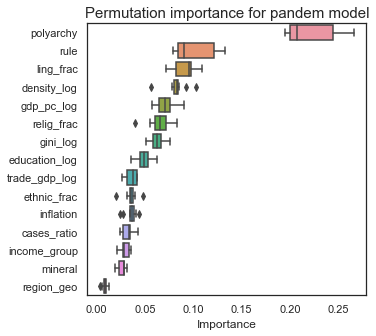

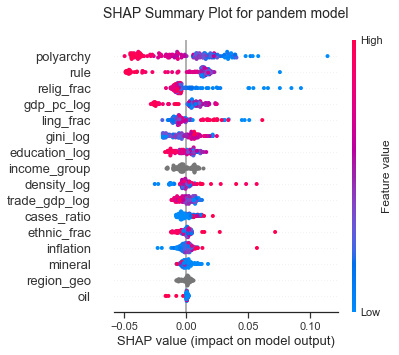

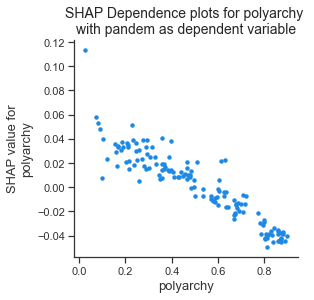

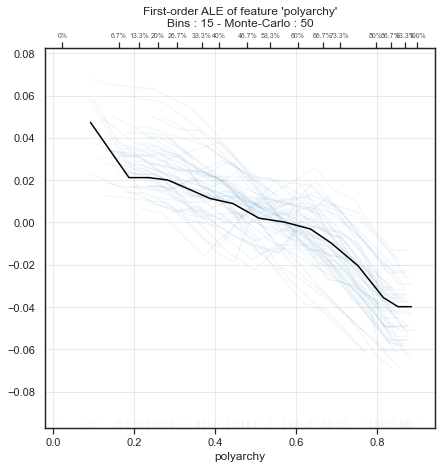

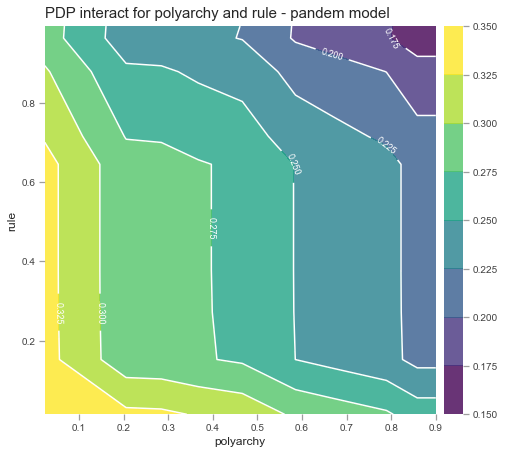

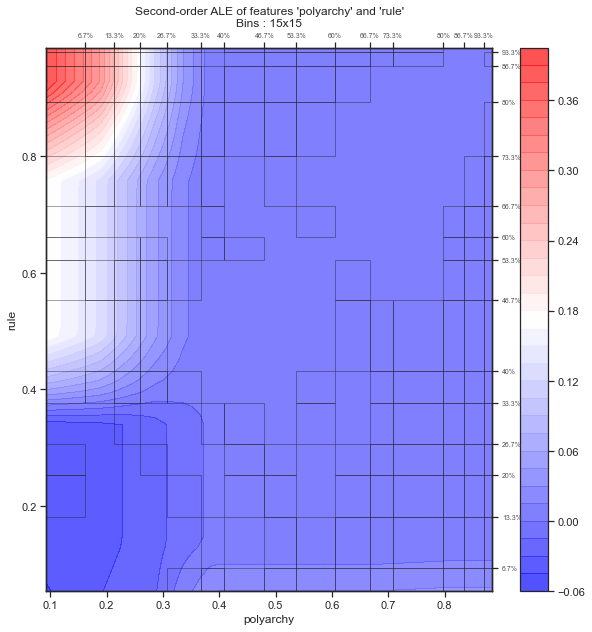

In [6]:
for i,j in models.items():
    display(f"Model {i}")
    xai_model = xai_wrapper.XAI_analysis(j["model"], df, i, features, path_write, True, True, "polyarchy", ["polyarchy", "rule"])